In [2]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the path to your dataset file)
data = pd.read_csv('adjusted_landslide_dataset1.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())

    Rainfall  Tilt Angle  Seismic Activity  Landslide
0  43.708611    1.611005          0.039200          0
1  95.564288    1.566203          0.017380          0
2  75.879455    1.393769          0.023866          0
3  63.879264    1.867993          0.036531          1
4  24.041678    1.724287          0.029284          0
Rainfall            0
Tilt Angle          0
Seismic Activity    0
Landslide           0
dtype: int64
           Rainfall    Tilt Angle  Seismic Activity     Landslide
count  10000.000000  10000.000000      10000.000000  10000.000000
mean      54.474360      1.754983          0.030002      0.391300
std       25.886711      0.318224          0.011471      0.488066
min       10.001047      1.200174          0.010002      0.000000
25%       32.169598      1.479340          0.020150      0.000000
50%       54.327576      1.756486          0.030083      0.000000
75%       76.600571      2.032127          0.039787      1.000000
max       99.974591      2.299917          0.04

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features (Rainfall, Tilt Angle, Seismic Activity) and target (Landslide)
X = data[['Rainfall', 'Tilt Angle', 'Seismic Activity']].values
y = data['Landslide'].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (8000, 3)
Test data shape: (2000, 3)


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Assuming X_train and X_test are already defined
# Reshape the input data to (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the deep learning model (as defined previously)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(1, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


c:\Users\SRMIST\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7704 - loss: 0.4653 - val_accuracy: 0.6194 - val_loss: 0.6626
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.2923 - val_accuracy: 0.7287 - val_loss: 0.4686
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9082 - loss: 0.2417 - val_accuracy: 0.9075 - val_loss: 0.2074
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.2369 - val_accuracy: 0.9631 - val_loss: 0.1076
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9116 - loss: 0.2097 - val_accuracy: 0.9663 - val_loss: 0.1055
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9146 - loss: 0.2178 - val_accuracy: 0.9663 - val_loss: 0.1064
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9130 - loss: 0.2171 - val_accuracy: 0.9606 - val_loss: 0.1033
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.2527 - val_accu

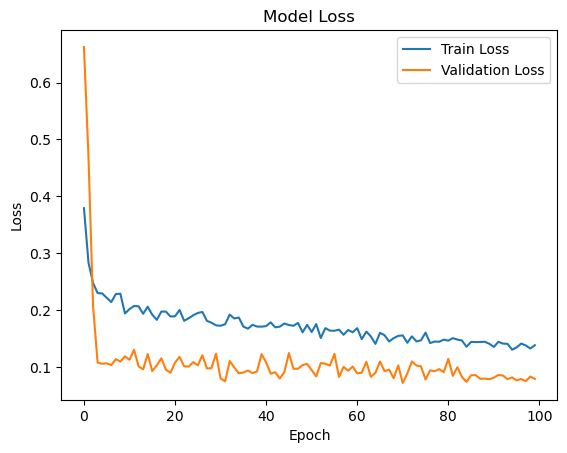

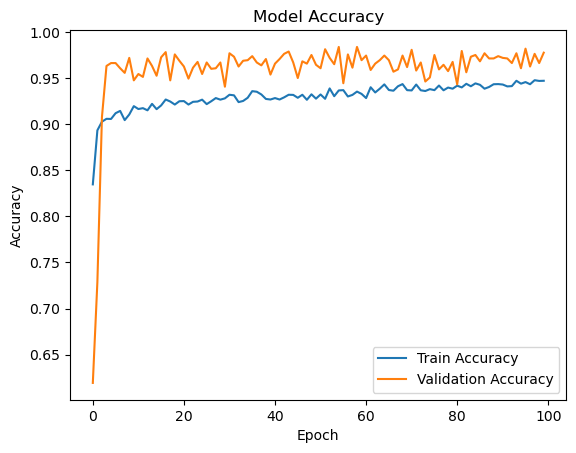

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [6]:
# Example new data for prediction
new_data = [[50, 1.8, 0.04]]  # Example input

# Normalize the new data
new_data_scaled = scaler.transform(new_data)

# Reshape the new data to match the model's input shape (samples, timesteps, features)
new_data_reshaped = new_data_scaled.reshape(new_data_scaled.shape[0], 1, new_data_scaled.shape[1])

# Predict landslide occurrence
prediction = model.predict(new_data_reshaped)  # Pass the reshaped data

# Convert prediction to binary outcome
predicted_class = (prediction > 0.5).astype(int)
print(f"Predicted Landslide Class: {predicted_class[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
Predicted Landslide Class: 1


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 


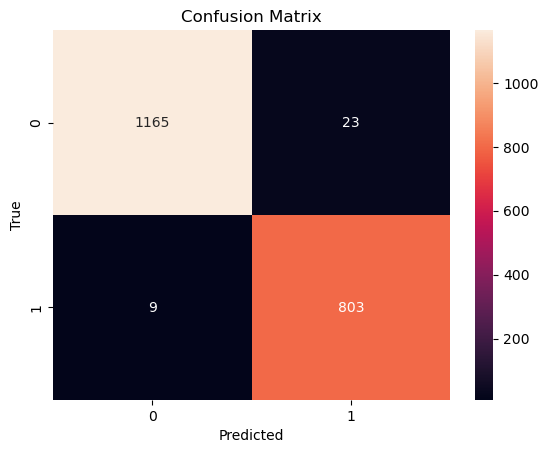

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1188
           1       0.97      0.99      0.98       812

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Reshape X_test to match the model's input shape
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Predictions using the reshaped X_test
y_pred = (model.predict(X_test_reshaped) > 0.5).astype(int)  # Pass X_test_reshaped

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [8]:
# Save the trained model
model.save('terrain_guard_model.h5')

# Load the model later for predictions
loaded_model = tf.keras.models.load_model('terrain_guard_model.h5')

In [9]:
from sklearn.model_selection import train_test_split

# Assuming X_test and y_test are your test data and labels
# Reduce the test set to 100 samples
X_test_reduced, _, y_test_reduced, _ = train_test_split(X_test, y_test, test_size=0.95, random_state=42)

# Check the new test set size
print(f"Reduced test set size: {len(y_test_reduced)}")

# Reshape X_test_reduced to match the model's input shape (samples, timesteps, features)
# Assuming your model expects a timestep dimension of 1
X_test_reduced = X_test_reduced.reshape(X_test_reduced.shape[0], 1, X_test_reduced.shape[1])

# Now make predictions and evaluate the model on the reduced test set
y_pred_reduced = (model.predict(X_test_reduced) > 0.5).astype(int)

# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_reduced, y_pred_reduced))

Reduced test set size: 100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


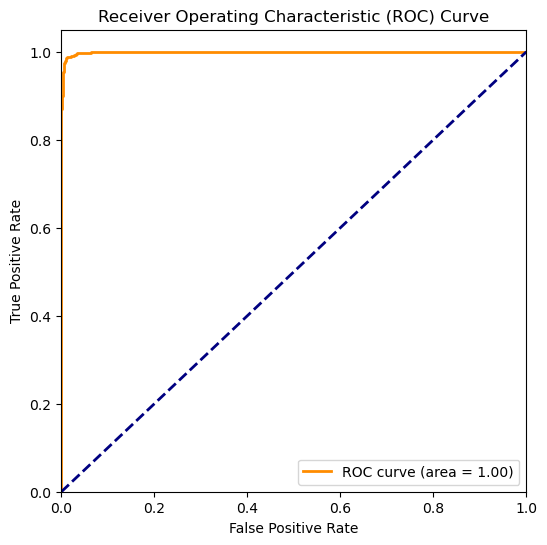

In [10]:
from sklearn.metrics import roc_curve, auc

# Reshape X_test to have an explicit timesteps dimension
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Compute predicted probabilities using the reshaped data
y_pred_prob = model.predict(X_test_reshaped)

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


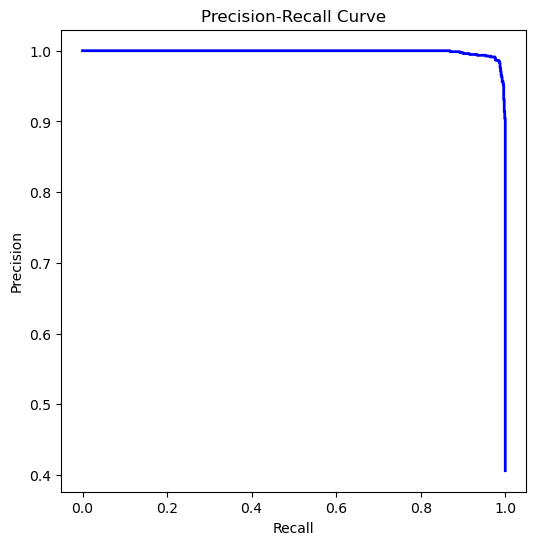

In [11]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision-recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


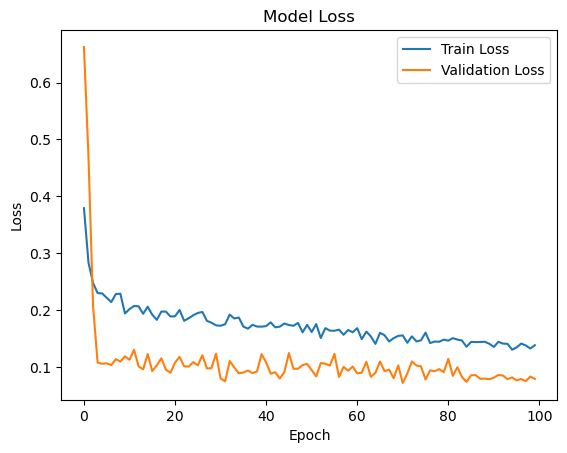

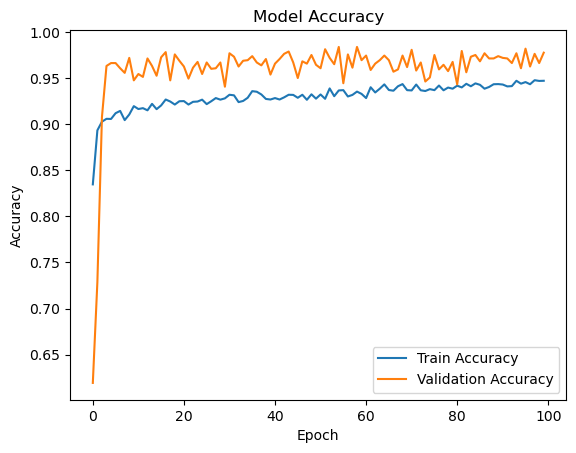

In [12]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [13]:
# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 899,589 (3.43 MB)

 Trainable params: 299,585 (1.14 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 599,172 (2.29 MB)

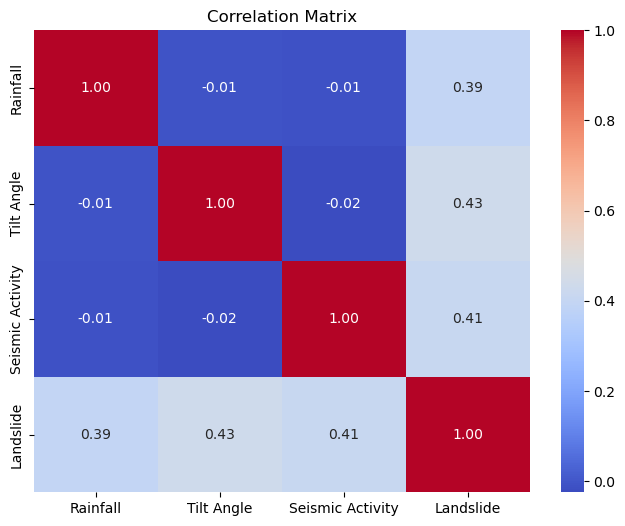

In [14]:
# Compute the correlation matrix
corr = data.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [15]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix # Import necessary functions

# Reshape X_test to add a batch dimension if needed
if X_test.ndim == 1:
    X_test = X_test.reshape(1, -1)  # Reshape for single sample
elif X_test.ndim == 2:
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1]) # Reshape for a batch of samples
# or
#   X_test = np.expand_dims(X_test, axis=0) # Reshape if you only have features

# Now predict using the reshaped data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Precision
precision = precision_score(y_test, y_pred) # Now precision_score is defined

# Recall / TPR / Sensitivity
recall = recall_score(y_test, y_pred)

# Specificity / TNR
specificity = tn / (tn + fp)

# FPR
fpr = fp / (fp + tn)

print(f"Precision: {precision*100:.2f}%")
print(f"Recall / TPR: {recall*100:.2f}%")
print(f"Specificity / TNR: {specificity*100:.2f}%")
print(f"FPR: {fpr*100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Precision: 97.22%
Recall / TPR: 98.89%
Specificity / TNR: 98.06%
FPR: 1.94%


In [16]:
!pip install pydot graphviz



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# Assuming 'model' is your Keras model object
# Generate and save model architecture to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture
from IPython.display import Image
Image(filename='model_architecture.png')


You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'model_architecture.png'

In [19]:
!pip install keras-visualizer



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip install visualkeras


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\SRMIST\anaconda3\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


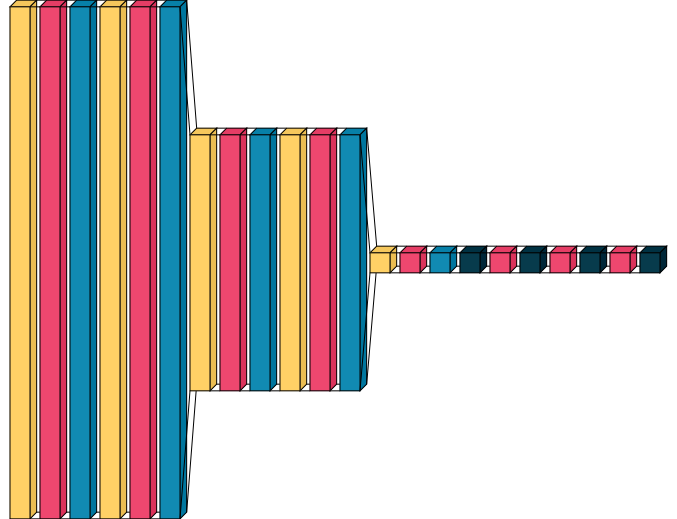

In [21]:
import visualkeras
visualkeras.layered_view(model)

In [42]:
import visualkeras
from PIL import ImageFont, Image, ImageDraw

# Load the font (update path if necessary)
try:
    font = ImageFont.truetype("Arial.ttf", 12)
except IOError:
    font = ImageFont.load_default()  # Fallback font if Arial.ttf is not found

# Generate and save the base model visualization
visualkeras.layered_view(model, legend=True, font=font, to_file='output.png')

# Open the saved image for editing
img = Image.open('output.png')
draw = ImageDraw.Draw(img)

# Function to draw text below each color box with an offset
def draw_text_below_box(text, box_x, box_y, offset=10, color="black"):
    draw.text((box_x, box_y + offset), text, font=font, fill=color)

# Manually position text below each layer's color box (adjust as necessary)
draw_text_below_box("InputLayer", 50, 30)      # Text for InputLayer
draw_text_below_box("Dense", 50, 80)           # Text for Dense
# Add more layer names as necessary, adjusting coordinates

# Add color box labels in the legend (Example coordinates with spacing between labels)
legend_y = img.height - 30  # Approximate y-coordinate for the legend at the bottom

# Add additional spacing between each label by increasing legend_x
draw_text_below_box("Input Layer", 50, legend_y, offset=5)
draw_text_below_box("Conv Layer", 150, legend_y, offset=5)
draw_text_below_box("Dense Layer", 250, legend_y, offset=5)
# Repeat for additional layers as needed

# Save the updated image with added spacing
img.save('output_with_layer_colors_spaced.png')

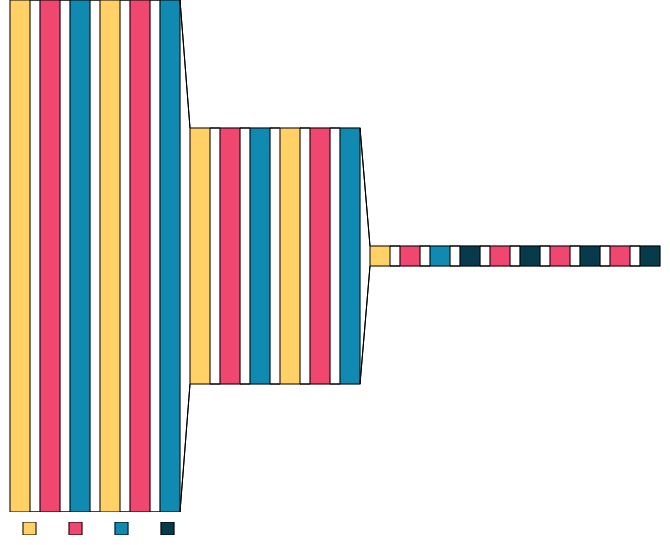

In [38]:
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False)


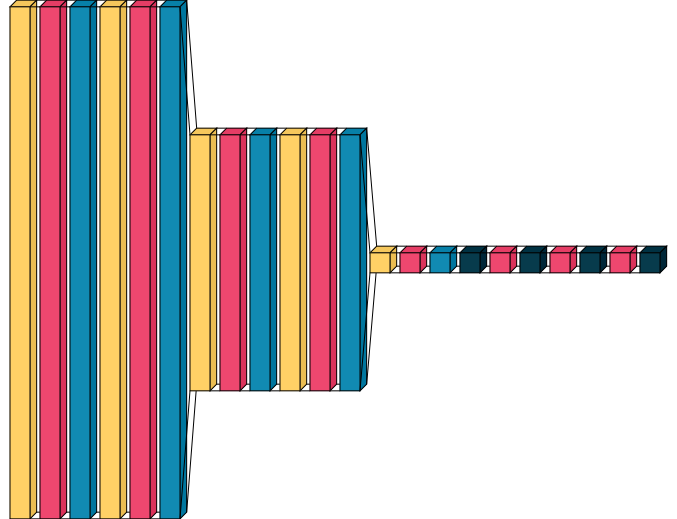

In [33]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

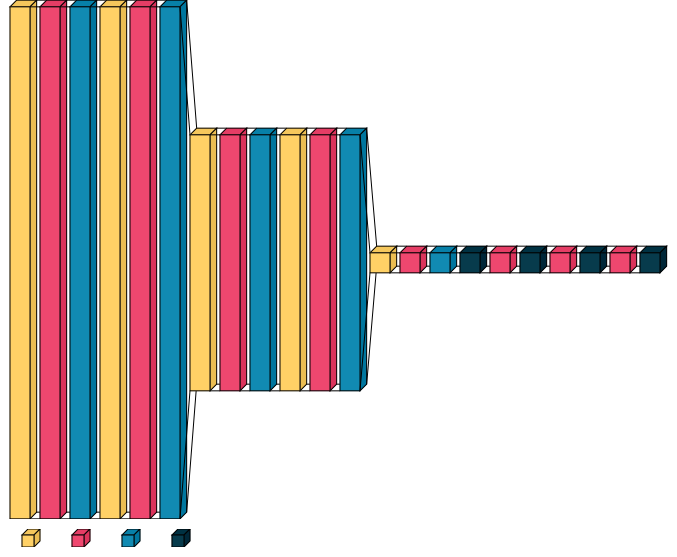

In [35]:
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

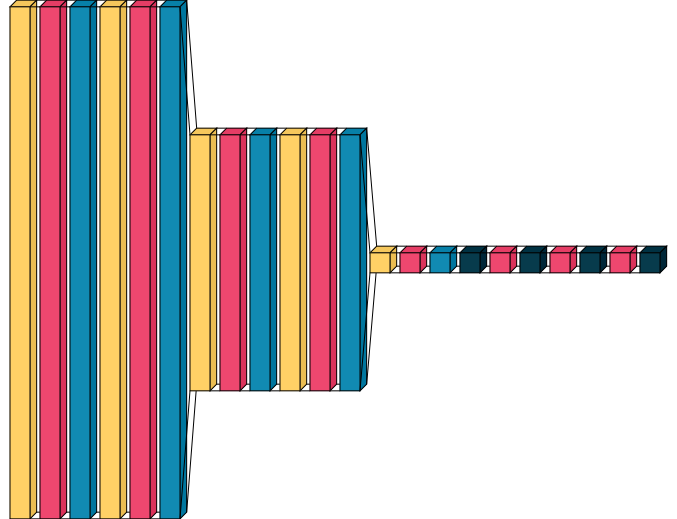

In [26]:
visualkeras.layered_view(model)